<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [26]:
import numpy as np
import random
from collections import Counter
import pandas as pd
%matplotlib inline

In [41]:
Y=365 +1
N=10**5
ClassSize=30


def SimulateBirthdays(Y=365 +1,N=10**5,ClassSize=30):
    ClassesWithDoubleBirthday=sum(
     Counter(np.random.randint(1,Y,ClassSize)).most_common(1)[0][1]>1    
     for _ in range(N) 
        )
    return ClassesWithDoubleBirthday/N        

# faster check
def SimulateBirthdaysSet(Y=365 +1,N=10**5,ClassSize=30):
    ClassesWithDoubleBirthday= 0
    for _ in range(N):
        experiment=np.random.randint(1,Y,ClassSize)     
        if len(set(experiment)) != len(experiment):
            ClassesWithDoubleBirthday+=1
    return ClassesWithDoubleBirthday/N 

# in theory even faster check
# We dod not notice it with Class=30, but with class=1000 it is an order of magnitude faster than the first,
# and 4 times faster than the second
def SimulateBirthdaysSet2(Y=365 +1,N=10**5,ClassSize=30):
    ClassesWithDoubleBirthday= 0
    for _ in range(N):
        experiment=np.random.randint(1,Y,ClassSize)  
        setOfElems = set()
        for elem in experiment:
            if elem in setOfElems:
                ClassesWithDoubleBirthday+=1
                break
            else:
                setOfElems.add(elem)         
    return ClassesWithDoubleBirthday/N 

%time SimulateBirthdays(ClassSize=1000)
%time SimulateBirthdaysSet(ClassSize=1000)
%time SimulateBirthdaysSet2(ClassSize=1000)

CPU times: user 28.2 s, sys: 151 ms, total: 28.4 s
Wall time: 28.8 s
CPU times: user 17.7 s, sys: 59.9 ms, total: 17.8 s
Wall time: 17.9 s
CPU times: user 4.23 s, sys: 34.1 ms, total: 4.26 s
Wall time: 4.35 s


1.0

CPU times: user 12.8 s, sys: 83.7 ms, total: 12.8 s
Wall time: 13.4 s


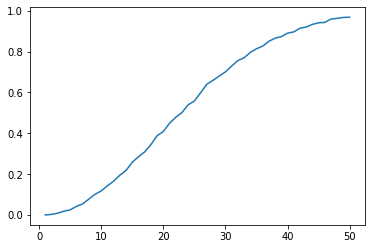

In [42]:
%%time
pd.Series({C:SimulateBirthdaysSet(Y=365 +1,N=10**4,ClassSize=C)  for C in range(1,51)}).plot();